## Loading libraries

In [19]:
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## Importing the dataset and checking for null values

In [20]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
print(df.shape)

(768, 9)


In [22]:
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Splitting the dataset

In [23]:
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


## Hyperparameter Tuning the K parameter

In [24]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

## Plotting the Train Score and Test Score

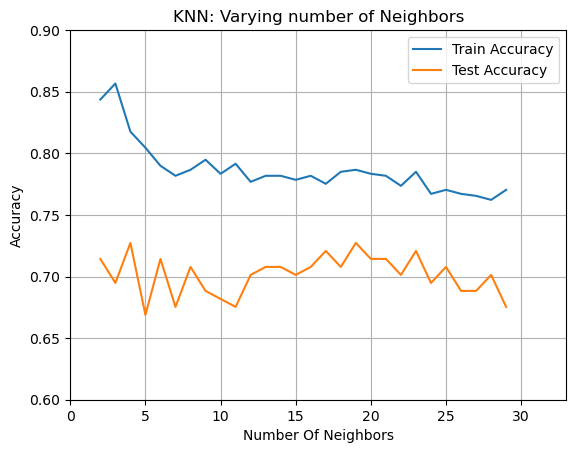

In [25]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

## Finding the best param ‘k’

In [26]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

4
19


As we can see, n_neighbors shows best accuracy score for 4 neighbors and 19 neighbors. But the K-NearestNeighbor Classifier will perform differently based on how data is split. This requires Hyperparameter Tuning using GridSearchCV. We can use RandomizedSearchCV too.

## Using GridSearchCV to determine the best_params_ for n_neighbors

In [27]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 23}


## Using the best parameter from above code to train the model and predict

In [28]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred)*100
print("Accuracy for testing dataset after tuning : {:.2f}%".format(accuracy_score))

Accuracy for testing dataset after tuning : 72.08%
